In [1]:
from qiskit import *
import math
import numpy as np

source  state $|\psi_\textrm{S} \rangle$,

$$
|\psi_\textrm{S}\rangle = \cos\left({\theta}\right) |00\rangle + \sin\left({\theta}\right) |11\rangle ,
$$



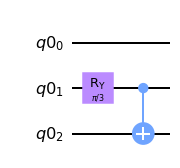

In [2]:
qr = QuantumRegister(3) # create register to store bits
#cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr) # creates the circuit

pi = np.pi
theta = pi/6

circuit.ry(pi/3,1)
circuit.cx(qr[1], qr[2])
#circuit.barrier()

%matplotlib inline
circuit.draw(output="mpl")

$$
M_\textrm{S}  = \begin{bmatrix}x & 0\\0 & 1\end{bmatrix}
$$

$$
M_\textrm{F}  = \begin{bmatrix}y & 0\\0 & 0\end{bmatrix}
$$

$$
(M_\textrm{S} \otimes I)|\psi_\textrm{S}\rangle = x\cos\left({\theta}\right) |00\rangle + \sin\left({\theta}\right) |11\rangle
$$

$$
= \sin\left({\theta}\right)(|00\rangle + |11\rangle) ,  where
$$ 
 
$$ 
  x=\tan\left({\theta}\right)<1 
$$


In [3]:
x = np.tan(theta)
print(x)
gamma = np.arccos(x)
#gamma = 54.73
print(gamma)
print(theta)

0.5773502691896257
0.9553166181245093
0.5235987755982988


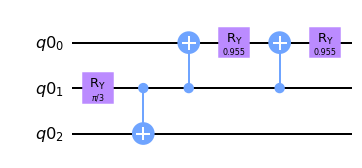

In [4]:

circuit.cx(qr[1], qr[0])
circuit.ry(gamma,0)
circuit.cx(qr[1], qr[0])
circuit.ry(gamma,0)

circuit.draw(output="mpl")


In [5]:

"""
circuit.measure(1,1)
circuit.measure(2,2)
circuit.measure(0,0)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
"""

"\ncircuit.measure(1,1)\ncircuit.measure(2,2)\ncircuit.measure(0,0)\nsimulator = Aer.get_backend('qasm_simulator')\nresult = execute(circuit, backend = simulator, shots = 1024).result()\ncounts = result.get_counts()\nfrom qiskit.tools.visualization import plot_histogram\nplot_histogram(counts)\n"

In [6]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
tomography_circs = state_tomography_circuits(circuit, [qr[1], qr[2]])
backend = Aer.get_backend('qasm_simulator')
result = execute(tomography_circs, backend = backend, shots = 100).result()
result.get_counts()

C:\Users\asuss\anaconda3\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:391: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  meas_qubit_registers = set(q.register for q in meas_qubits)
C:\Users\asuss\anaconda3\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:391: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  meas_qubit_registers = set(q.register for q in meas_qubits)
C:\Users\asuss\anaconda3\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:398: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  prep_qubit_registers = set(q.register for q in prep_qubits)
C:\U

[{'00': 30, '01': 12, '10': 18, '11': 40},
 {'00': 27, '01': 29, '10': 22, '11': 22},
 {'00': 39, '01': 30, '10': 19, '11': 12},
 {'00': 25, '01': 32, '10': 22, '11': 21},
 {'00': 10, '01': 31, '10': 47, '11': 12},
 {'00': 37, '01': 43, '10': 13, '11': 7},
 {'00': 39, '01': 8, '10': 42, '11': 11},
 {'00': 38, '01': 13, '10': 41, '11': 8},
 {'00': 75, '11': 25}]

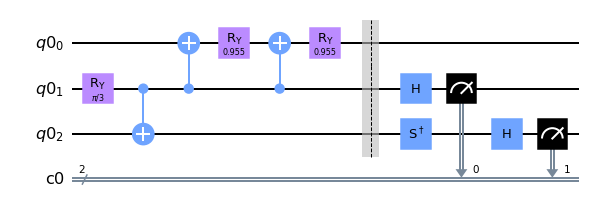

In [7]:
tomography_circs[1].draw(output='mpl')

In [8]:
fitter = StateTomographyFitter(result, tomography_circs).fit()

In [9]:
from qiskit.quantum_info import state_fidelity
phi_plus = np.array([1, 0, 0, 1])/np.sqrt(2)   # | Phi^+ >
simulated_output_fidelity = state_fidelity(fitter, phi_plus)
print('Simulated output fidelity = {:.4f}'.format(simulated_output_fidelity))

Simulated output fidelity = 0.7249


In [10]:

"""
conditional_counts = {}
for result, count in ancilla_results.get_counts(0).items():
    # Get measurement out comes
    target_measurement = result.split(' ')[0]
    control_measurement = result.split(' ')[1]
    
    # Keep counts if target qubits were measured '00' or '11'
    if target_measurement in ('00', '11'):
            
            # Add counts to existing events or create new key-value pair
            if control_measurement in conditional_counts:
                conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
            else:
                conditional_counts[control_measurement] = count
"""

"\nconditional_counts = {}\nfor result, count in ancilla_results.get_counts(0).items():\n    # Get measurement out comes\n    target_measurement = result.split(' ')[0]\n    control_measurement = result.split(' ')[1]\n    \n    # Keep counts if target qubits were measured '00' or '11'\n    if target_measurement in ('00', '11'):\n            \n            # Add counts to existing events or create new key-value pair\n            if control_measurement in conditional_counts:\n                conditional_counts[control_measurement] = conditional_counts[control_measurement] + count\n            else:\n                conditional_counts[control_measurement] = count\n"